In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm
from lightgbm import LGBMRegressor

In [2]:
train = pd.read_csv('C:/Users/wnrrh/desktop/dacon/택배 운송량 예측 경진대회/train.csv',encoding='utf-8')
test = pd.read_csv('C:/Users/wnrrh/desktop/dacon/택배 운송량 예측 경진대회/test.csv',encoding='utf-8')
ss = pd.read_csv('C:/Users/wnrrh/desktop/dacon/택배 운송량 예측 경진대회/sample_submission.csv',encoding='utf-8')
train.set_index('index',inplace=True)
test.set_index('index',inplace=True)

In [3]:
# index, 종속변수 제거b
X_train = train.iloc[:,1:5]
# 종속변수(y) -> 운송량
y_train = train.iloc[:, -1]
X_test = test

train.shape
train.tail()
train.head(10)

# 결측치 확인 - 없음 
train.isnull().sum()
y_train.isnull().sum()


# 카테고리별 개수

print('카테고리_대 : ', len(train['DL_GD_LCLS_NM'].unique()))
print('카테고리_중 : ', len(train['DL_GD_MCLS_NM'].unique()))

train['DL_GD_MCLS_NM']
train['DL_GD_MCLS_NM'].unique()

카테고리_대 :  6
카테고리_중 :  20


array(['상의', '반려동물', '기타패션의류', '농산물', '가공식품', '스킨케어', '기타식품', '생활용품',
       '건강식품', '주방용품', '건강용품', '냉동/간편조리식품', '문구/사무용품', '축산', '문화컨텐츠',
       '음반', '음료', '수산', '과자', '기타디지털/가전'], dtype=object)

# train_Encoding

In [4]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


# Label Encoding
# print(train['DL_GD_MCLS_NM'])
encoder_M = LabelEncoder()
train['DL_GD_MCLS_NM'] = encoder_M.fit_transform(train['DL_GD_MCLS_NM'])
# print(train['DL_GD_MCLS_NM'])
# print(encoder_M.classes_)
print(list(train['DL_GD_MCLS_NM']))

print(list(encoder_M.inverse_transform(train['DL_GD_MCLS_NM'])))
encoder_L = LabelEncoder()
train['DL_GD_LCLS_NM'] = encoder_L.fit_transform(train['DL_GD_LCLS_NM'])

Train = pd.get_dummies(train, columns = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM'])


[12, 11, 6, 8, 0, 15, 8, 6, 0, 5, 13, 1, 18, 0, 2, 7, 7, 2, 1, 1, 1, 9, 9, 19, 12, 18, 5, 8, 11, 11, 11, 0, 2, 0, 15, 9, 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 17, 17, 16, 11, 1, 1, 1, 8, 18, 0, 0, 1, 7, 16, 1, 11, 1, 2, 5, 5, 13, 7, 16, 16, 11, 10, 1, 1, 14, 2, 3, 18, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 14, 16, 8, 8, 19, 8, 8, 0, 14, 5, 7, 7, 5, 8, 5, 0, 8, 8, 8, 6, 14, 14, 14, 8, 6, 8, 14, 1, 16, 8, 16, 8, 8, 3, 8, 8, 8, 8, 8, 16, 8, 9, 8, 8, 8, 8, 8, 8, 16, 16, 16, 8, 8, 8, 8, 8, 17, 17, 17, 17, 17, 17, 17, 17, 8, 8, 8, 19, 5, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 16, 16, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 13, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8

# test_encoding

In [5]:
test['INVC_CONT'] = 0

In [6]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

encoder_test_M = LabelEncoder()
test['DL_GD_MCLS_NM'] = encoder_test_M.fit_transform(test['DL_GD_MCLS_NM'])
# print(train['DL_GD_MCLS_NM'])
# print(encoder_M.classes_)
print(list(test['DL_GD_MCLS_NM']))

print(list(encoder_test_M.inverse_transform(test['DL_GD_MCLS_NM'])))
encoder_test_L = LabelEncoder()
test['DL_GD_LCLS_NM'] = encoder_test_L.fit_transform(test['DL_GD_LCLS_NM'])

Test = pd.get_dummies(test, columns = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM'])

[8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 18, 12, 6, 4, 4, 4, 4, 12, 11, 9, 1, 10, 0, 0, 5, 5, 18, 5, 14, 14, 0, 10, 13, 6, 12, 9, 11, 0, 0, 0, 12, 18, 1, 0, 18, 8, 9, 1, 16, 18, 16, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 17, 11, 13, 5, 8, 16, 16, 1, 1, 5, 0, 16, 13, 10, 16, 5, 0, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 14, 6, 16, 8, 8, 8, 14, 8, 16, 19, 8, 5, 5, 5, 8, 8, 8, 8, 14, 14, 14, 8, 8, 8, 8, 8, 14, 14, 8, 14, 14, 19, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 14, 16, 8, 19, 17, 17, 17, 17, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 

In [7]:
X = Train.iloc[:,3:]
Y = Train['INVC_CONT']

# shape 확인

In [8]:
print(Train.shape)
print(Test.shape)
print(ss.shape)

(32000, 29)
(4640, 29)
(4640, 2)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2, shuffle=True, random_state = 1)

<AxesSubplot:>

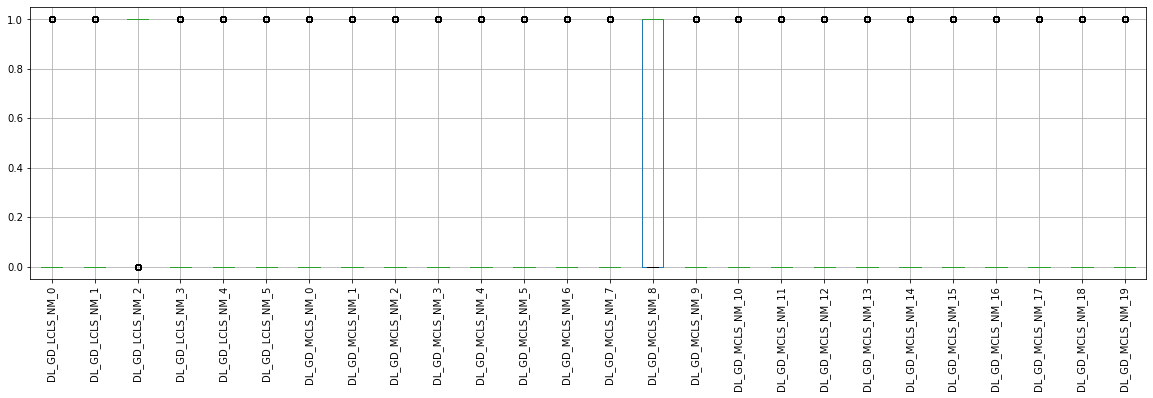

In [10]:
plt.figure(figsize=(20, 5))
X_train.boxplot(rot=90)


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train ,test_size=0.25, shuffle = True, random_state = 1)
X_val.shape

(6400, 26)

# Modeling

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error as mse
import numpy as np


In [13]:
# GridSearch
lgbm = LGBMRegressor()

# dict
params = {'n_estimators': [100, 200, 400, 600, 800],
         'learning_rate': np.linspace(0.01, 0.2, 10),
         'max_depth': [4, 6, 8, 10],
         'colsample_bytree': [0.8, 0.9, 1.0],
         'subsample': [0.8, 0.9,1.0]}

grid = GridSearchCV(LGBMRegressor(), params, cv=5, scoring='neg_mean_squared_error')



In [14]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 400, 600, 800],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [15]:
from math import sqrt
y_val_pred = grid.predict(X_test)
print(grid.best_params_)
grid.best_score_
grid.score(X_val,y_val)
grid.cv_results_

sqrt(mse(y_test, y_val_pred))
X_train.shape

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}


(19200, 26)

In [16]:
# Cross_val_socre
cross_val_score(grid, X_train, y_train, cv=5)

array([-26.68452702, -39.71175749, -46.31300009, -36.78439273,
       -28.34511844])

In [18]:
Test

,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT,DL_GD_LCLS_NM_0,DL_GD_LCLS_NM_1,DL_GD_LCLS_NM_2,DL_GD_LCLS_NM_3,DL_GD_LCLS_NM_4,DL_GD_LCLS_NM_5,DL_GD_MCLS_NM_0,...,DL_GD_MCLS_NM_10,DL_GD_MCLS_NM_11,DL_GD_MCLS_NM_12,DL_GD_MCLS_NM_13,DL_GD_MCLS_NM_14,DL_GD_MCLS_NM_15,DL_GD_MCLS_NM_16,DL_GD_MCLS_NM_17,DL_GD_MCLS_NM_18,DL_GD_MCLS_NM_19
index,,,,,,,,,,,,,,,,,,,,,
32000,5.013000e+15,1.165000e+15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32001,5.013000e+15,1.154500e+15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32002,5.013000e+15,4.139000e+15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32003,5.013000e+15,4.221000e+15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32004,5.013000e+15,2.726000e+15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36635,5.013000e+15,4.725000e+15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36636,5.013000e+15,2.826000e+15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36637,5.013000e+15,4.311100e+15,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_X = Test.drop(['SEND_SPG_INNB','REC_SPG_INNB','INVC_CONT'],axis=1)
print(test_X.shape)
pred = grid.predict(test_X)
ss["INVC_CONT"] = pred
# ss
# pred.shape
# ss.shape
ss

(4640, 26)


,index,INVC_CONT
0,32000,4.384945
1,32001,4.384945
2,32002,4.384945
3,32003,4.384945
4,32004,4.384945
...,...,...
4635,36635,4.384945
4636,36636,4.384945
4637,36637,4.384945
4638,36638,4.384945


In [22]:
ss.to_csv('C:/Users/wnrrh/desktop/dacon/Transit_Lgbm_jihun.csv',index=False)
